In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel(r'/content/mediaTRUELY_TIDIED2.xlsx')

In [ ]:
pd.set_option('display.max_columns', 33)

In [ ]:
df.head(2)

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,gross_rev,cogs,gross_profit,discount_percent,discount_total,net_sales,approx_defected_items,sales_issue,result_of_issue
0,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4.9558,6.98,7,0.0,48.86,34.6906,14.1694,0.0,0.0,14.1694,0,date_of_shipment entry error,uncertainty & no profit
1,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,1.3286,1.82,4,0.0,7.28,5.3144,1.9656,0.0,0.0,1.9656,0,date_of_shipment entry error,uncertainty & no profit


In [ ]:
df['sales_issue'].value_counts()

sales_issue
major delayed shipment                                  2647
none                                                    2488
random discount                                         1883
date_of_shipment entry error                            1461
defects                                                  409
defects & COGS                                           399
random discount & COGS                                   234
date_of_shipment entry error & likely defects            163
major delayed shipment & COGS                            158
date_of_shipment entry error & likely defects & COGS      76
date_of_shipment entry error & COGS                       53
COGS                                                      15
delayed same day delivery                                  8
Name: count, dtype: int64

# GOAL: Build a Supervised Model that is able to predict the probability that an order will lead to an issue in shipment (all major delayed shipments as well as date of shipment entry errors)

As my focus in deliverable 2 was on the most recent years data (2014), my model will only include those transactions as well


In [ ]:
df = df.loc[df['order_date']>= '2014']

# Visual support as to why I feel a model centered around 'Predicting Whether a Transaction Will Lead to an Error in Shipment' is most valuable to SuperSuppliers.

In [ ]:
df.columns

Index(['order_id', 'order_date', 'day_ordered', 'ship_date', 'ship_mode',
       'stand_delivery_delay', 'days_to_ship', 'cust_id', 'cust_name',
       'cust_type', 'city', 'state', 'zip', 'region', 'prod_id', 'prod_type',
       'prod_sub-type', 'prod_name', 'prod_cost', 'prod_price',
       'quantity_ordered', 'ship_cost', 'gross_rev', 'cogs', 'gross_profit',
       'discount_percent', 'discount_total', 'net_sales',
       'approx_defected_items', 'sales_issue', 'result_of_issue'],
      dtype='object')

In [ ]:
df_14 = pd.DataFrame(df[['sales_issue']].value_counts(normalize = True))

In [ ]:
df_14['proportion'] = round(df_14['proportion'] * 100,2)

In [ ]:
#df_14['proportion'] = df_14['proportion'].astype(str) + '%'

In [ ]:
df_14.index

MultiIndex([(                              'major delayed shipment',),
            (                                                'none',),
            (                                     'random discount',),
            (                        'date_of_shipment entry error',),
            (                                      'defects & COGS',),
            (                                             'defects',),
            (                              'random discount & COGS',),
            (                       'major delayed shipment & COGS',),
            (       'date_of_shipment entry error & likely defects',),
            (                 'date_of_shipment entry error & COGS',),
            ('date_of_shipment entry error & likely defects & COGS',),
            (                                                'COGS',),
            (                           'delayed same day delivery',)],
           names=['sales_issue'])

In [ ]:
df_14 = df_14.reset_index()

In [ ]:
df_14.rename(columns = {'sales_issue': 'Sales Issues (2014)', 'proportion': 'Percentages'}, inplace = True)

In [ ]:
df_14.set_index('Sales Issues (2014)')

,Percentages
Sales Issues (2014),
major delayed shipment,27.75
none,25.19
random discount,18.71
date_of_shipment entry error,13.77
defects & COGS,4.04
defects,3.65
random discount & COGS,2.44
major delayed shipment & COGS,1.69
date_of_shipment entry error & likely defects,1.45


In [ ]:
filt = df_14['Sales Issues (2014)'].str.contains('delayed') | df_14['Sales Issues (2014)'].str.contains('error')

df_ship = df_14.loc[filt, ['Sales Issues (2014)', 'Percentages']].set_index('Sales Issues (2014)')

In [ ]:
cumulative_percentage = df_ship['Percentages'].sum()

In [ ]:
 total_ship = pd.DataFrame({'Sales Issues (2014)': ['Total Shipment Issues'], 'Percentages': [cumulative_percentage]}).set_index('Sales Issues (2014)')

In [ ]:
filt = ~(df_14['Sales Issues (2014)'].str.contains('delayed')) & ~(df_14['Sales Issues (2014)'].str.contains('error'))
other_issues = df_14.loc[filt].set_index('Sales Issues (2014)')

In [ ]:
sales_descriptions = pd.concat([total_ship, other_issues])

In [ ]:
sales_descriptions

,Percentages
Sales Issues (2014),
Total Shipment Issues,45.86
none,25.19
random discount,18.71
defects & COGS,4.04
defects,3.65
random discount & COGS,2.44
COGS,0.12


(0.0, 100.0)

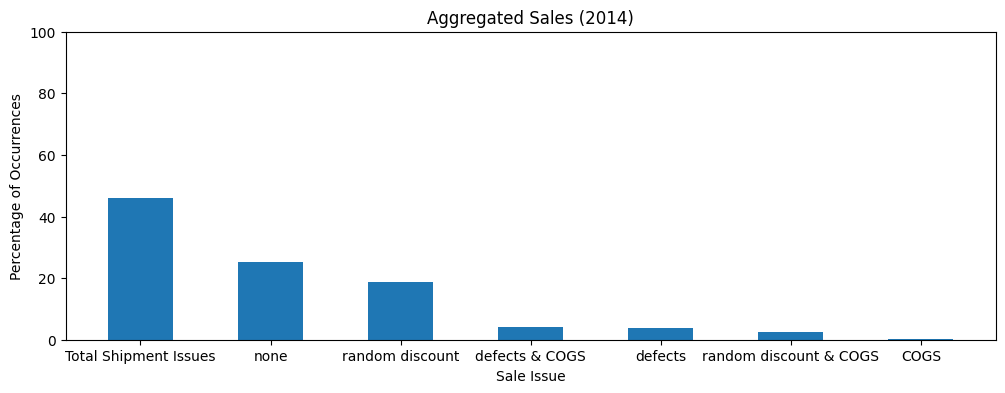

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (12,4))
ax.bar(sales_descriptions.index, sales_descriptions['Percentages'], width = 0.5)
ax.set(title = "Aggregated Sales (2014)", xlabel = 'Sale Issue', ylabel = 'Percentage of Occurrences')
ax.set_ylim(ymax = 100)

In [ ]:
sales_descriptions['Percentages'] = sales_descriptions['Percentages'].astype(str) + '%'

In [ ]:
sales_descriptions

,Percentages
Sales Issues (2014),
Total Shipment Issues,45.86%
none,25.19%
random discount,18.71%
defects & COGS,4.04%
defects,3.65%
random discount & COGS,2.44%
COGS,0.12%


Creating a binary field for 'shipment issue'

In [ ]:
df['shipment_issue?'] = np.nan

In [ ]:
filt = (df['sales_issue'].str.contains('delayed') | (df['sales_issue'].str.contains('error')))

df.loc[filt,'shipment_issue?'] = 1

In [ ]:
df['shipment_issue?'].fillna(0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3319 entries, 6675 to 9993
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               3319 non-null   object        
 1   order_date             3319 non-null   datetime64[ns]
 2   day_ordered            3319 non-null   object        
 3   ship_date              3319 non-null   datetime64[ns]
 4   ship_mode              3319 non-null   object        
 5   stand_delivery_delay   3319 non-null   int64         
 6   days_to_ship           3319 non-null   int64         
 7   cust_id                3319 non-null   object        
 8   cust_name              3319 non-null   object        
 9   cust_type              3319 non-null   object        
 10  city                   3319 non-null   object        
 11  state                  3319 non-null   object        
 12  zip                    3319 non-null   int64         
 13  regio

In [ ]:
filt = (df['shipment_issue?'] == 0.0)

df.loc[filt, 'shipment_issue?'] = df.loc[filt, 'shipment_issue?'].replace(0.0, 0)

In [ ]:
df['shipment_issue?'] = df['shipment_issue?'].astype(int)

In [ ]:
df.head()

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,gross_rev,cogs,gross_profit,discount_percent,discount_total,net_sales,approx_defected_items,sales_issue,result_of_issue,shipment_issue?
6675,CA-2014-114412,2014-04-16,Wednesday,2014-04-21,Standard Class,6,5,AA-10480,Andrew Allen,Consumer,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,3.36960,6.22080,3,0.00000,18.6624,10.1088,8.5536,0.2,3.1104,5.4432,0,random discount,net sales decrease,0
6676,US-2014-156909,2014-07-17,Thursday,2014-07-19,Second Class,4,2,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",33.87621,44.07221,2,4.63918,92.7836,72.3916,20.3920,0.3,21.4116,-1.0196,0,random discount,net loss,0
6677,CA-2014-107727,2014-10-20,Monday,2014-10-24,Second Class,4,4,MA-17560,Matt Abelman,Home Office,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Staples,5.91896,11.19936,3,1.76832,35.3664,19.5252,15.8412,0.2,5.8944,9.9468,0,random discount,net sales decrease,0
6678,CA-2014-120999,2014-11-09,Sunday,2014-09-16,Standard Class,6,-54,LC-16930,Linda Cazamias,Corporate,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,32.65290,44.15040,4,0.00000,176.6016,130.6116,45.9900,0.2,29.4336,16.5564,0,date_of_shipment entry error,uncertainty & no profit,1
6679,CA-2014-139619,2014-09-20,Saturday,2014-09-24,Standard Class,6,4,ES-14080,Erin Smith,Corporate,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",43.02720,57.36960,2,0.00000,114.7392,86.0544,28.6848,0.2,19.1232,9.5616,0,random discount,net sales decrease,0


# First aim to see how model turns out using Logistic Regression

creating dummy variables to use some of the qualitative variables as predictors

In [ ]:
df_log_reg = df.copy()

In [ ]:
df_log_reg['month_ordered'] = df_log_reg['order_date'].dt.month_name()

In [ ]:
df_log_reg.head(2)

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,gross_rev,cogs,gross_profit,discount_percent,discount_total,net_sales,approx_defected_items,sales_issue,result_of_issue,shipment_issue?,month_ordered
6675,CA-2014-114412,2014-04-16,Wednesday,2014-04-21,Standard Class,6,5,AA-10480,Andrew Allen,Consumer,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,3.36960,6.22080,3,0.00000,18.6624,10.1088,8.5536,0.2,3.1104,5.4432,0,random discount,net sales decrease,0,April
6676,US-2014-156909,2014-07-17,Thursday,2014-07-19,Second Class,4,2,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",33.87621,44.07221,2,4.63918,92.7836,72.3916,20.3920,0.3,21.4116,-1.0196,0,random discount,net loss,0,July


creating integer values to represet day of week and month ordered

In [ ]:
def get_month_int(month):
  d = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
  for k, v in d.items():
    if month == k:
      return v

#print(get_month_int('January'))

df_log_reg['month_ordered'] = df_log_reg['month_ordered'].apply(get_month_int)

In [ ]:
def get_day_int(day):
  d = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
  for k, v in d.items():
    if day == k:
      return v

df_log_reg['day_ordered'] = df_log_reg['day_ordered'].apply(get_day_int)

In [ ]:
df_log_reg.head(2)

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,gross_rev,cogs,gross_profit,discount_percent,discount_total,net_sales,approx_defected_items,sales_issue,result_of_issue,shipment_issue?,month_ordered
6675,CA-2014-114412,2014-04-16,3,2014-04-21,Standard Class,6,5,AA-10480,Andrew Allen,Consumer,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,3.36960,6.22080,3,0.00000,18.6624,10.1088,8.5536,0.2,3.1104,5.4432,0,random discount,net sales decrease,0,4
6676,US-2014-156909,2014-07-17,4,2014-07-19,Second Class,4,2,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",33.87621,44.07221,2,4.63918,92.7836,72.3916,20.3920,0.3,21.4116,-1.0196,0,random discount,net loss,0,7


dropped columns that aren't relevant to the predictive model and some columns that I believe will prevent the model from performing well on unseen data (in other words, dimensionality reduction to only include variables that are most relevant to predicting whether the transacion leads to 'shipment issues' don't cause the model to overfit to noise)



In [ ]:
# adding to drop 'cust_name', 'region', 'prod_type

In [ ]:
df_log_reg.drop(columns = ['order_id', 'order_date', 'ship_date', 'cust_id', 'cust_name', 'zip', 'region', 'prod_id', 'prod_type', 'sales_issue', 'result_of_issue'], inplace = True)

In [ ]:
#disregard columns ['order_id', 'order_date', 'ship_date', 'cust_id', 'zip', 'prod_id', 'sales_issue', 'result_of_issue']

In [ ]:
df_log_reg = pd.get_dummies(df_log_reg, columns = ['ship_mode', 'cust_type', 'city', 'state', 'prod_sub-type', 'prod_name'] )

In [ ]:
df_log_reg.head(2)

,day_ordered,stand_delivery_delay,days_to_ship,prod_cost,prod_price,quantity_ordered,ship_cost,gross_rev,cogs,gross_profit,discount_percent,discount_total,net_sales,approx_defected_items,shipment_issue?,month_ordered,...,prod_name_Xerox 23,prod_name_Xerox 230,prod_name_Xerox 231,prod_name_Xerox 4200 Series MultiUse Premium Copy Paper (20Lb. and 84 Bright),"prod_name_Xerox Color Copier Paper, 11"" x 17"", Ream","prod_name_XtraLife ClearVue Slant-D Ring Binder, White, 3""",prod_name_XtraLife ClearVue Slant-D Ring Binders by Cardinal,prod_name_Zebra Zazzle Fluorescent Highlighters,prod_name_Zipper Ring Binder Pockets,prod_name_i.Sound Portable Power - 8000 mAh,prod_name_iHome FM Clock Radio with Lightning Dock,"prod_name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",prod_name_iOttie HLCRIO102 Car Mount,prod_name_iOttie XL Car Mount,prod_name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,prod_name_netTALK DUO VoIP Telephone Service
6675,3,6,5,3.36960,6.22080,3,0.00000,18.6624,10.1088,8.5536,0.2,3.1104,5.4432,0,0,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6676,4,4,2,33.87621,44.07221,2,4.63918,92.7836,72.3916,20.3920,0.3,21.4116,-1.0196,0,0,7,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#get dummies for ['ship_mode', 'cust_name', 'cust_type', 'city', 'state', 'region', 'prod_type', 'prod_sub-type', 'prod_name']

In [ ]:
indep_vars = [i for i in df_log_reg.columns if i != 'shipment_issue?']
dep_vars = 'shipment_issue?'
x = df_log_reg[indep_vars]
y = df_log_reg[dep_vars]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6892655367231638
0.6159638554216867


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I believe that this data is simply to complex for a Logistic Regression Model, its decent but ultimately unable to converge and the Logistic Regression Model isn't reliable enough to accurately make predictions on unseen data

# Attemp with Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_carts = df.copy()

In [ ]:
df_carts['month_ordered'] = df_carts['order_date'].dt.month_name()

manual dimensionality reduction

In [ ]:
df_carts.drop(columns = ['order_id', 'order_date', 'ship_date', 'cust_id', 'cust_name', 'zip', 'region', 'prod_id', 'prod_type', 'sales_issue', 'result_of_issue'], inplace = True)

In [ ]:
df_carts.shape

(3319, 22)

In [ ]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_split= 20)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9898305084745763
0.9728915662650602


NOTE: The big different in predictive performance was due to leaving the ***days_to_ship*** variable in the model.

---



In [ ]:
y_train.value_counts()

shipment_issue?
0    1422
1    1233
Name: count, dtype: int64

[Text(0.5769230769230769, 0.875, 'days_to_ship <= 17.5\ngini = 0.497\nsamples = 2655\nvalue = [1422, 1233]\nclass = c'),
 Text(0.3076923076923077, 0.625, 'days_to_ship <= -10.5\ngini = 0.367\nsamples = 1837\nvalue = [1393, 444]\nclass = c'),
 Text(0.15384615384615385, 0.375, 'prod_name_Belkin F9S820V06 8 Outlet Surge <= 0.5\ngini = 0.022\nsamples = 448\nvalue = [5, 443]\nclass = l'),
 Text(0.07692307692307693, 0.125, 'gini = 0.018\nsamples = 447\nvalue = [4, 443]\nclass = l'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = c'),
 Text(0.46153846153846156, 0.375, 'city_Beaumont <= 0.5\ngini = 0.001\nsamples = 1389\nvalue = [1388, 1]\nclass = c'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 1388\nvalue = [1388, 0]\nclass = c'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = l'),
 Text(0.8461538461538461, 0.625, 'net_sales <= -0.105\ngini = 0.068\nsamples = 818\nvalue = [29, 789]\nclass = l'),
 Text(0.769

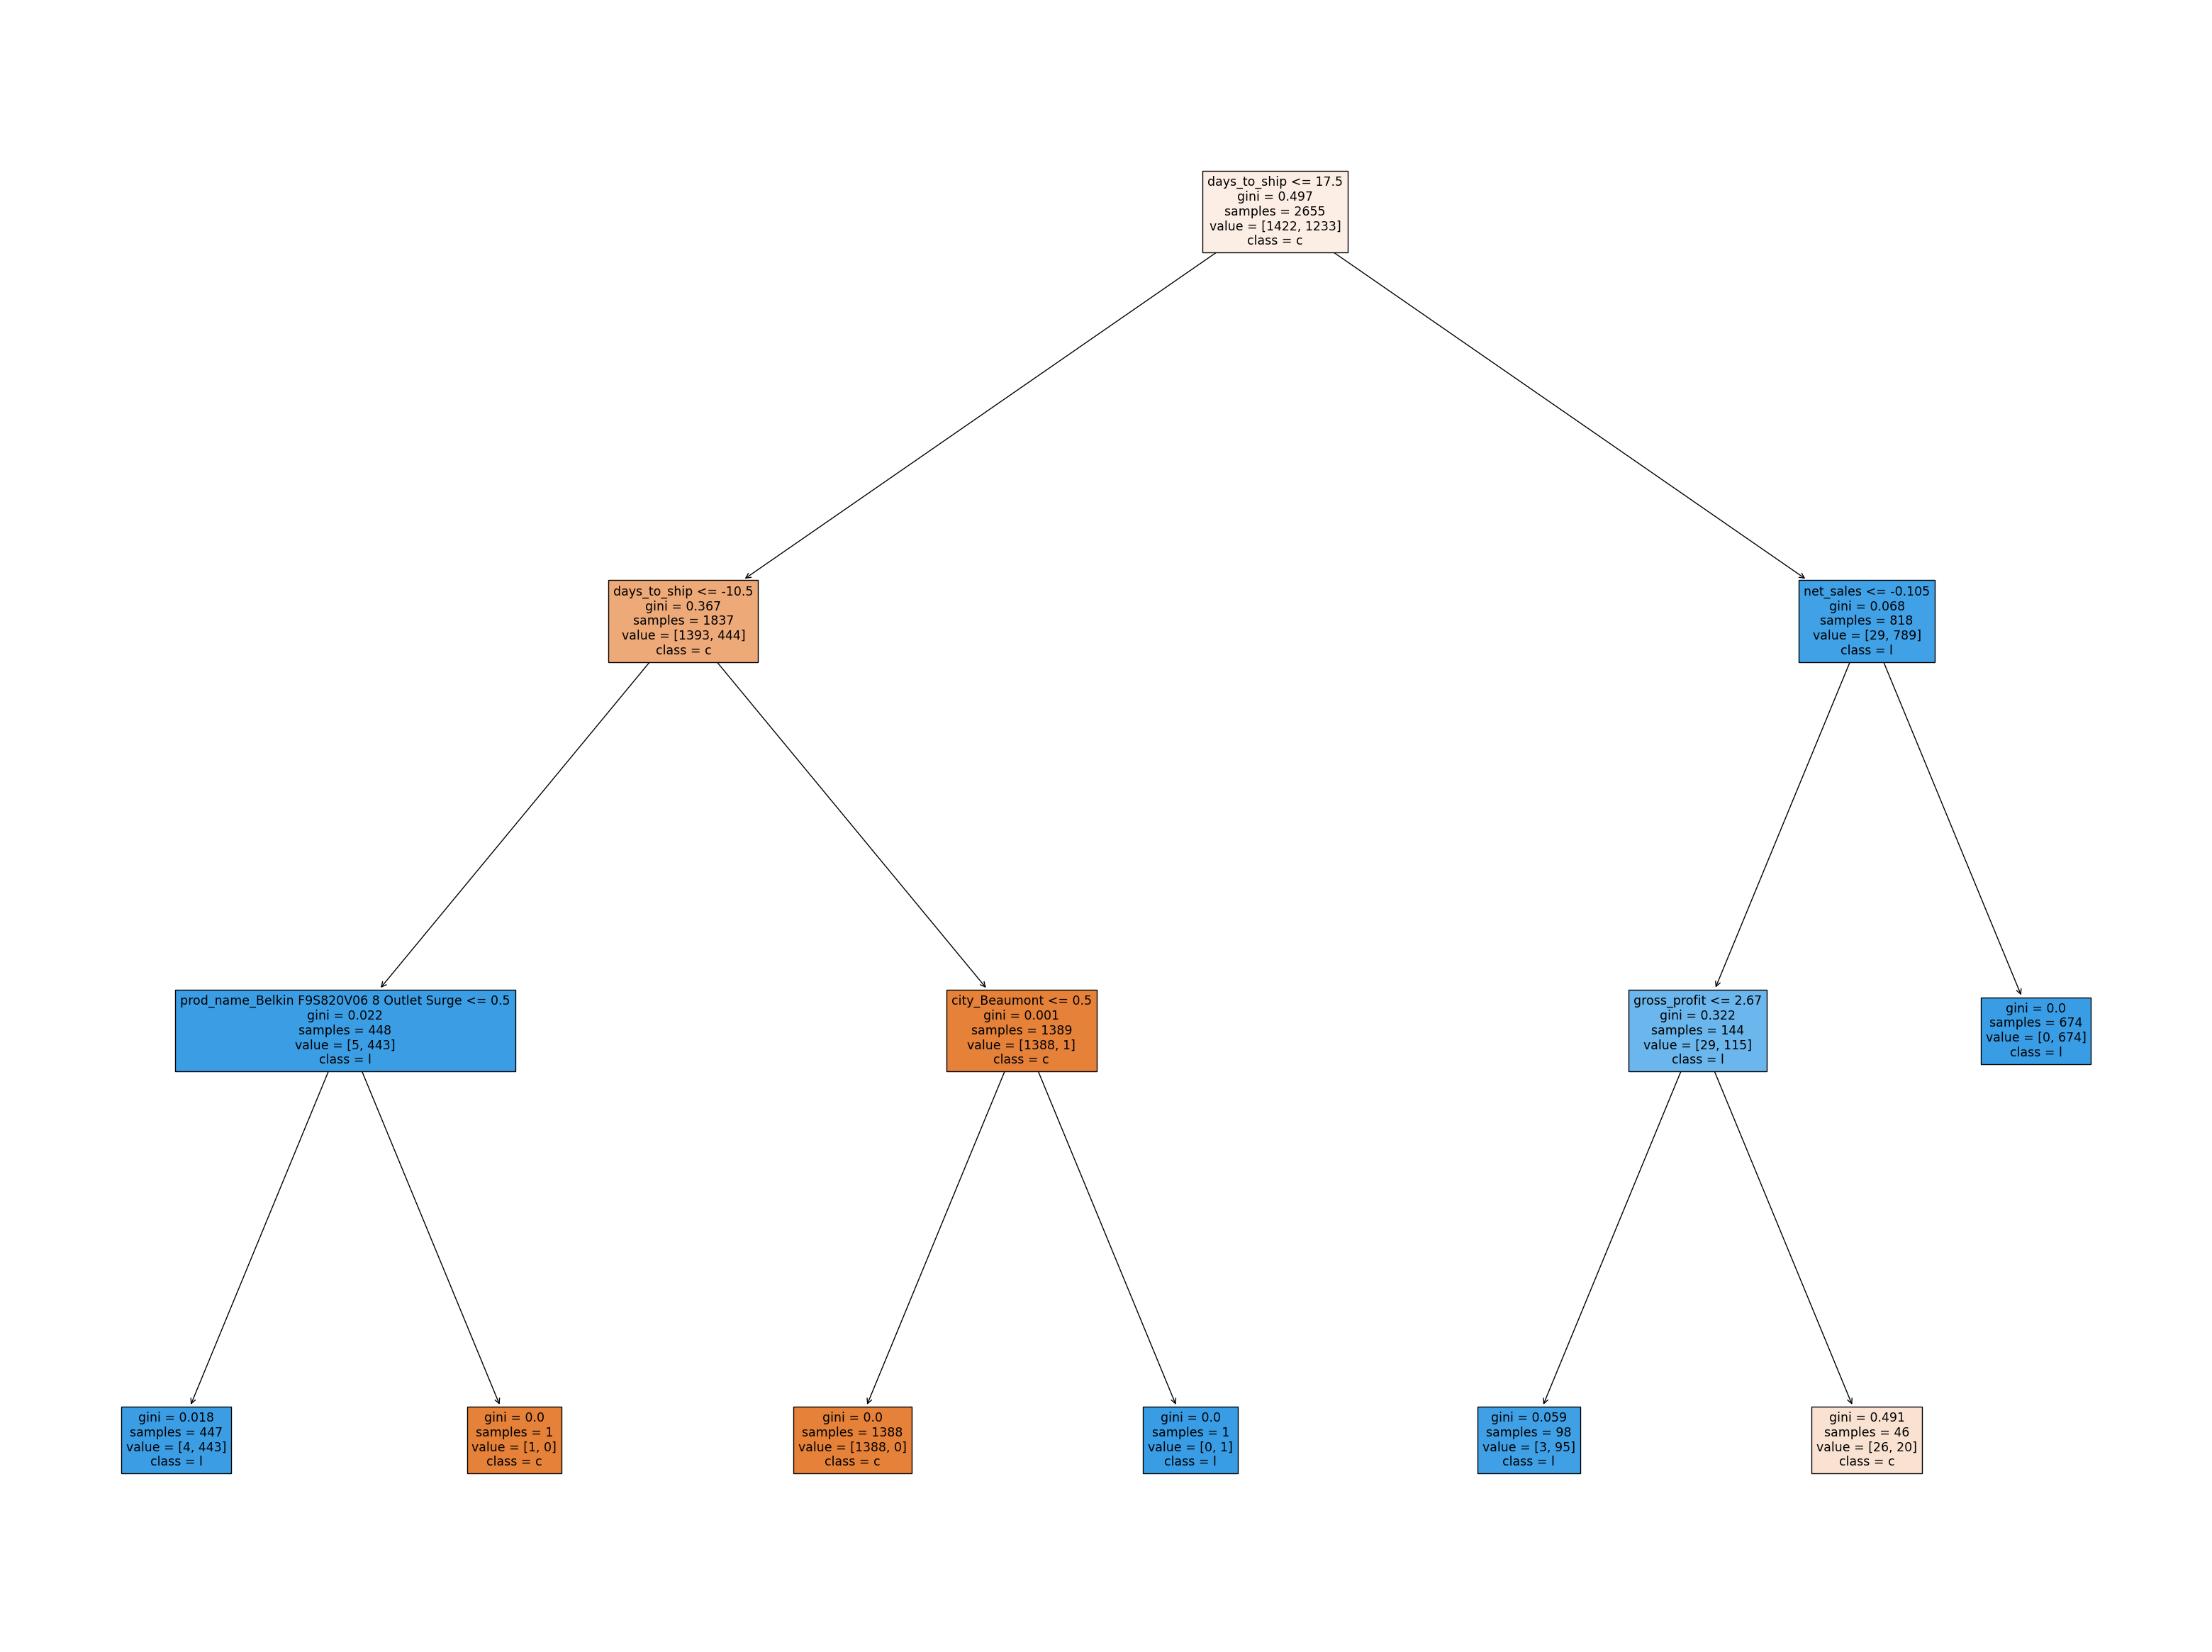

In [ ]:
from sklearn import tree
fig = plt.figure(figsize = (40, 30))
tree.plot_tree(model, feature_names = x_train.columns, class_names = 'class', filled = True)

In [ ]:
preds = model.predict_proba(x_test)
preds = np.array([i[1] for i in preds])

Certainty of model that the sample does not/does belong to a recognized 'issue in shipment'

In [ ]:
preds[0:10]

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.43478261, 0.99105145, 0.99105145, 0.        , 0.99105145])

In [ ]:
import seaborn as sns

# Visualization of how well the model is able to distinguing between categorizing samples that do vs dont have issues with shipment

<ipython-input-68-cee9cf5c8b8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds[y_test==0], hist = False, kde=True, label = 'No Issue with Shipment')
<ipython-input-68-cee9cf5c8b8e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds[y_test==1], hist = False, kde = Tr

(0.0, 1.0)

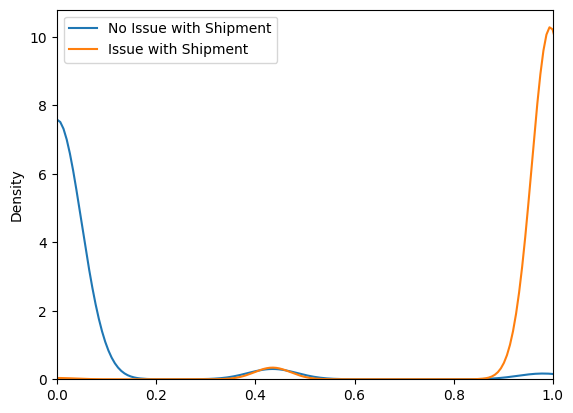

In [ ]:
sns.distplot(preds[y_test==0], hist = False, kde=True, label = 'No Issue with Shipment')
sns.distplot(preds[y_test==1], hist = False, kde = True, label = 'Issue with Shipment')
plt.legend()
plt.xlim(0,1)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted 0','Predicted 1'], index = ['True 0', 'True 1'])
cm

,Predicted 0,Predicted 1
True 0,367,8
True 1,10,279


WITH THE TESTING DATA

367 True Negatives: The Model Predicted that the transaction didn't have an issue with shipment and the transaction correctly didn't have an issue with shipment.

8 False Positives: The model incorrectly predicted that 8 of the transactions contained an issue with shipment, when they in fact did not.

10 False Negatives: The Model incorrectly predicted 10 transactions did not have an issue with shipment, when they in fact did.

279 True Positives: The model correctly predicted 279 transactions that did contain issues with shipment.

# Precision & Recall

In [ ]:
precision = cm.loc['True 1', 'Predicted 1']/cm['Predicted 1'].sum()
recall = cm.loc['True 1', 'Predicted 1']/cm.loc['True 1'].sum()
print('Recall: ', str(round(100*recall, 2))+'%')
print('Precision: ', str(round(100*precision,2)) + '%')

Recall:  96.54%
Precision:  97.21%
